In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
import graphviz
import os

In [2]:
from matplotlib import rcParams
# figure properties
rcParams['figure.figsize'] = (6,4)
rcParams['figure.dpi'] = 150
rcParams['savefig.dpi'] = 300
rcParams['savefig.bbox'] = 'tight'
# tick styling
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['xtick.bottom'] = True
rcParams['ytick.left'] = True
rcParams['ytick.right'] = True
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
#legend styling
rcParams['legend.fancybox'] = False
rcParams['legend.edgecolor'] = 'k'
rcParams['legend.fontsize'] = 10
# line styling
rcParams['lines.linewidth'] = 1.5
rcParams['errorbar.capsize'] = 3

rcParams['mathtext.default'] = 'regular'
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 14
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10

In [3]:
pd.set_option('display.max_columns', None)

# Load data 

In [4]:
rawdata = pd.read_csv('data/clean/masterdata.csv')

In [5]:
rawdata

,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,year,fips,geographic area name,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,co2_conc,count,county,state
0,6.600000,20.300000,18.400000,6.900000,24.000000,16.300000,2010,6001,"Alameda County, California",85014.0,44439.0,1477980,532026,8.242266,4.516133,7.746238,6.190675,5.983918,16.833576,1.344671,0.115032,12.456474,9.671581,20,Alameda County,CA
1,9.800000,30.500000,28.500000,9.500000,13.200000,5.800000,2010,6005,"Amador County, California",65103.0,33411.0,38327,14715,3.533809,2.324159,2.154264,0.767924,1.230037,2.657153,9.113150,0.013592,9.893939,9.671581,1,Amador County,CA
2,5.900000,19.700000,22.300000,8.200000,24.500000,13.700000,2010,6013,"Contra Costa County, California",91791.0,47627.0,1024809,368087,8.502881,2.053047,5.690774,5.219690,3.747755,8.936203,1.937314,0.062757,13.799532,9.671581,10,Contra Costa County,CA
3,10.800000,23.200000,22.600000,7.600000,13.400000,6.300000,2010,6019,"Fresno County, California",52306.0,28843.0,908830,283836,2.584943,3.393157,8.102919,8.195578,2.956637,5.566242,4.951451,0.144450,8.000660,9.671581,2,Fresno County,CA
4,6.400000,26.000000,29.300000,8.800000,17.700000,8.600000,2010,6023,"Humboldt County, California",53221.0,24568.0,133058,54276,3.758567,4.875083,6.387722,4.355516,2.546245,3.080551,10.761663,0.287420,7.378587,9.671581,2,Humboldt County,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0.002326,0.015866,0.011163,0.006452,0.012130,0.004171,2019,55131,"Washington County, Wisconsin",95408.0,44643.0,136034,55256,6.772115,4.075576,4.520776,7.052628,2.627769,5.617490,1.301216,0.000000,13.398305,NaN,200,Washington County,fl
5144,0.000399,0.003754,0.003427,0.001684,0.005299,0.002786,2019,55133,"Waukesha County, Wisconsin",113591.0,48449.0,404198,160635,6.531578,2.257291,2.776481,5.617705,3.804277,10.051981,0.783142,0.000000,12.112071,NaN,6,Waukesha County,mi
5145,0.002219,0.012883,0.007517,0.004034,0.008855,0.003567,2019,55139,"Winnebago County, Wisconsin",76425.0,40352.0,171907,71238,4.487773,5.818524,4.635167,8.995199,5.120862,7.269996,2.880485,0.000000,9.185955,NaN,63,Winnebago County,tx
5146,0.006054,0.038556,0.019355,0.012654,0.012519,0.006938,2019,55141,"Wood County, Wisconsin",68511.0,31511.0,72999,32684,1.759271,6.360911,2.105006,2.631257,2.444621,7.951903,3.677640,0.021417,8.886286,NaN,25,Wood County,wi


In [6]:
rawdata[rawdata['year']==2019]

,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,year,fips,geographic area name,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,co2_conc,count,county,state
4550,0.006873,0.021135,0.013360,0.005511,0.007037,0.004785,2019,1015,"Calhoun County, Alabama",61918.0,26143.0,113605,44636,0.871494,1.478627,3.064791,3.718971,1.315082,2.291872,18.467157,0.206112,8.908763,NaN,95,Calhoun County,fl
4551,0.000688,0.002805,0.002189,0.000900,0.002122,0.001485,2019,1073,"Jefferson County, Alabama",70617.0,31870.0,658573,264753,3.643396,2.032460,4.615623,7.511152,6.807477,9.367222,3.044347,0.039660,11.313856,NaN,1890,Jefferson County,fl
4552,0.001867,0.008242,0.007120,0.003561,0.007858,0.007638,2019,1081,"Lee County, Alabama",80982.0,22163.0,164542,64448,3.391882,2.540032,2.509000,6.515330,5.705375,8.248510,18.256579,0.000000,11.331970,NaN,24871,Lee County,fl
4553,0.000912,0.003606,0.003762,0.001664,0.004921,0.003225,2019,1089,"Madison County, Alabama",84935.0,39603.0,372909,155878,2.000924,1.006556,4.628620,6.771321,6.295308,5.854579,4.030716,0.025661,10.072001,NaN,80,Madison County,fl
4554,0.001524,0.005924,0.003341,0.001342,0.002452,0.001308,2019,1097,"Mobile County, Alabama",61182.0,29216.0,413210,155946,0.845806,1.440883,2.665025,6.462493,6.545214,5.233222,9.803393,0.241750,10.030590,NaN,1,Mobile County,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0.002326,0.015866,0.011163,0.006452,0.012130,0.004171,2019,55131,"Washington County, Wisconsin",95408.0,44643.0,136034,55256,6.772115,4.075576,4.520776,7.052628,2.627769,5.617490,1.301216,0.000000,13.398305,NaN,200,Washington County,fl
5144,0.000399,0.003754,0.003427,0.001684,0.005299,0.002786,2019,55133,"Waukesha County, Wisconsin",113591.0,48449.0,404198,160635,6.531578,2.257291,2.776481,5.617705,3.804277,10.051981,0.783142,0.000000,12.112071,NaN,6,Waukesha County,mi
5145,0.002219,0.012883,0.007517,0.004034,0.008855,0.003567,2019,55139,"Winnebago County, Wisconsin",76425.0,40352.0,171907,71238,4.487773,5.818524,4.635167,8.995199,5.120862,7.269996,2.880485,0.000000,9.185955,NaN,63,Winnebago County,tx
5146,0.006054,0.038556,0.019355,0.012654,0.012519,0.006938,2019,55141,"Wood County, Wisconsin",68511.0,31511.0,72999,32684,1.759271,6.360911,2.105006,2.631257,2.444621,7.951903,3.677640,0.021417,8.886286,NaN,25,Wood County,wi


# Preprocessing & Validation

In [8]:
data = rawdata.drop(columns=['fips', 'geographic area name', 'county', 'state'])

In [9]:
data.head(3)

,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,year,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,co2_conc,count
0,6.6,20.3,18.4,6.9,24.0,16.3,2010,85014.0,44439.0,1477980,532026,8.242266,4.516133,7.746238,6.190675,5.983918,16.833576,1.344671,0.115032,12.456474,9.671581,20
1,9.8,30.5,28.5,9.5,13.2,5.8,2010,65103.0,33411.0,38327,14715,3.533809,2.324159,2.154264,0.767924,1.230037,2.657153,9.113150,0.013592,9.893939,9.671581,1
2,5.9,19.7,22.3,8.2,24.5,13.7,2010,91791.0,47627.0,1024809,368087,8.502881,2.053047,5.690774,5.219690,3.747755,8.936203,1.937314,0.062757,13.799532,9.671581,10


In [10]:
data.isna().sum()

9th to 12th grade, no diploma                     0
high school graduate (includes equivalency)       0
some college, no degree                           0
associate's degree                                0
bachelor's degree                                 0
graduate or professional degree                   0
year                                              0
median income (family)                            0
median income (nonfamily)                         0
total population                                  0
occupied housing units                            0
1-unit, attached                                  0
2 units                                           0
3 or 4 units                                      0
5 to 9 units                                      0
10 to 19 units                                    0
20 or more units                                  0
mobile home                                       0
boat, rv, van, etc.                               0
commute time

In [11]:
data.dtypes

9th to 12th grade, no diploma                  float64
high school graduate (includes equivalency)    float64
some college, no degree                        float64
associate's degree                             float64
bachelor's degree                              float64
graduate or professional degree                float64
year                                             int64
median income (family)                         float64
median income (nonfamily)                      float64
total population                                 int64
occupied housing units                           int64
1-unit, attached                               float64
2 units                                        float64
3 or 4 units                                   float64
5 to 9 units                                   float64
10 to 19 units                                 float64
20 or more units                               float64
mobile home                                    float64
boat, rv, 

In [12]:
data['count'] = data['count'] / data['total population']

In [13]:
data.head()

,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,year,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,co2_conc,count
0,6.6,20.3,18.4,6.9,24.0,16.3,2010,85014.0,44439.0,1477980,532026,8.242266,4.516133,7.746238,6.190675,5.983918,16.833576,1.344671,0.115032,12.456474,9.671581,0.000014
1,9.8,30.5,28.5,9.5,13.2,5.8,2010,65103.0,33411.0,38327,14715,3.533809,2.324159,2.154264,0.767924,1.230037,2.657153,9.113150,0.013592,9.893939,9.671581,0.000026
2,5.9,19.7,22.3,8.2,24.5,13.7,2010,91791.0,47627.0,1024809,368087,8.502881,2.053047,5.690774,5.219690,3.747755,8.936203,1.937314,0.062757,13.799532,9.671581,0.000010
3,10.8,23.2,22.6,7.6,13.4,6.3,2010,52306.0,28843.0,908830,283836,2.584943,3.393157,8.102919,8.195578,2.956637,5.566242,4.951451,0.144450,8.000660,9.671581,0.000002
4,6.4,26.0,29.3,8.8,17.7,8.6,2010,53221.0,24568.0,133058,54276,3.758567,4.875083,6.387722,4.355516,2.546245,3.080551,10.761663,0.287420,7.378587,9.671581,0.000015


# Spatial Prediction (2017 Data)

## Select and Split Data

In [14]:
data_2017 = data[data['year'] == 2017]

In [15]:
features = data_2017.drop(columns='count')
response = data_2017[['count']]

In [16]:
features.head()

,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,year,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,co2_conc
2418,0.000840,0.005137,0.005692,0.001885,0.004747,0.002729,2017,94913.0,56170.0,298225,106012,0.0,6.147417,11.848659,7.701958,4.023129,8.273592,4.707958,0.0,9.603974,46.345191
2419,0.005618,0.043566,0.059641,0.015191,0.055439,0.030096,2017,110923.0,57594.0,32434,12273,0.0,5.442842,8.612401,7.414650,5.288031,6.705777,7.129471,0.0,8.092742,46.345191
2420,0.000468,0.001477,0.001666,0.000575,0.001199,0.000880,2017,60790.0,31095.0,1007257,398530,0.0,2.077886,3.337264,4.034075,6.030914,9.388001,11.843776,0.0,9.943073,12.219866
2421,0.000108,0.000360,0.000386,0.000134,0.000317,0.000181,2017,69647.0,38629.0,4155501,1489533,0.0,1.200510,4.356667,6.026385,7.359891,9.332589,5.792084,0.0,11.056817,12.219866
2422,0.000863,0.002353,0.002037,0.000800,0.001058,0.000496,2017,65375.0,31937.0,724153,223808,0.0,2.191611,4.391264,4.167411,3.088808,5.551634,3.813537,0.0,12.162250,9.160473


In [17]:
response.head()

,count
2418,0.000003
2419,0.000092
2420,0.000048
2421,0.000004
2422,0.003215


In [18]:
features_scale = StandardScaler().fit_transform(features)
response_scale = response
features_scale.shape, response_scale.shape

((777, 21), (777, 1))

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(features, response, test_size=0.3, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((543, 21), (234, 21), (543, 1), (234, 1))

## Basic Decision Tree Regressor

In [20]:
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtrain)
err_train = mean_squared_error(ytrain, ypred)
ypred = model.predict(xtest)
err_test = mean_squared_error(ypred, ytest)
print(f'Train Error:\t{err_train}')
print(f'Test Error:\t{err_test}')

Train Error:	3.8659042417396524e-08
Test Error:	0.000159394077459925


## Cross Validated Decision Tree Regressor

In [21]:
model = DecisionTreeRegressor()
folder = KFold(n_splits=5, random_state=None, shuffle=True)
folds = folder.split(xtrain, ytrain)
params = {'min_samples_leaf':np.arange(5,20)}
cv_model = GridSearchCV(model, param_grid=params, scoring=make_scorer(mean_squared_error), cv=folds)
cv_model.fit(xtrain, ytrain)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fb97c77d950>,
             error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14

In [22]:
pd.DataFrame(cv_model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.013108,0.004297,0.004021,0.002167,6,{'min_samples_leaf': 6},0.000044,0.000154,0.000039,0.000040,0.000039,0.000063,0.000045,1
4,0.008229,0.002929,0.003372,0.000464,9,{'min_samples_leaf': 9},0.000059,0.000167,0.000026,0.000024,0.000028,0.000061,0.000054,2
5,0.008750,0.001564,0.002101,0.000965,10,{'min_samples_leaf': 10},0.000057,0.000169,0.000027,0.000025,0.000025,0.000061,0.000056,3
7,0.006785,0.001175,0.002112,0.000457,12,{'min_samples_leaf': 12},0.000057,0.000171,0.000020,0.000030,0.000020,0.000060,0.000057,4
3,0.008878,0.001923,0.005364,0.006284,8,{'min_samples_leaf': 8},0.000051,0.000159,0.000030,0.000029,0.000028,0.000059,0.000051,5
6,0.007862,0.000882,0.002089,0.000608,11,{'min_samples_leaf': 11},0.000057,0.000171,0.000021,0.000027,0.000020,0.000059,0.000057,6
0,0.021123,0.012782,0.004674,0.002820,5,{'min_samples_leaf': 5},0.000045,0.000156,0.000039,0.000027,0.000024,0.000058,0.000050,7
8,0.007276,0.001953,0.002550,0.001505,13,{'min_samples_leaf': 13},0.000050,0.000170,0.000020,0.000028,0.000020,0.000058,0.000057,8
9,0.007897,0.003205,0.002578,0.001812,14,{'min_samples_leaf': 14},0.000048,0.000168,0.000024,0.000024,0.000020,0.000057,0.000056,9
2,0.009318,0.002891,0.002582,0.001402,7,{'min_samples_leaf': 7},0.000033,0.000151,0.000030,0.000030,0.000038,0.000056,0.000047,10


In [23]:
model_best = cv_model.best_estimator_
ypred = model_best.predict(xtrain)
err_train = mean_squared_error(ytrain, ypred)
ypred = model_best.predict(xtest)
err_test = mean_squared_error(ypred, ytest)
print(f'Train Error:\t{err_train}')
print(f'Test Error:\t{err_test}')

Train Error:	3.113757676254888e-05
Test Error:	3.0475409217126306e-05


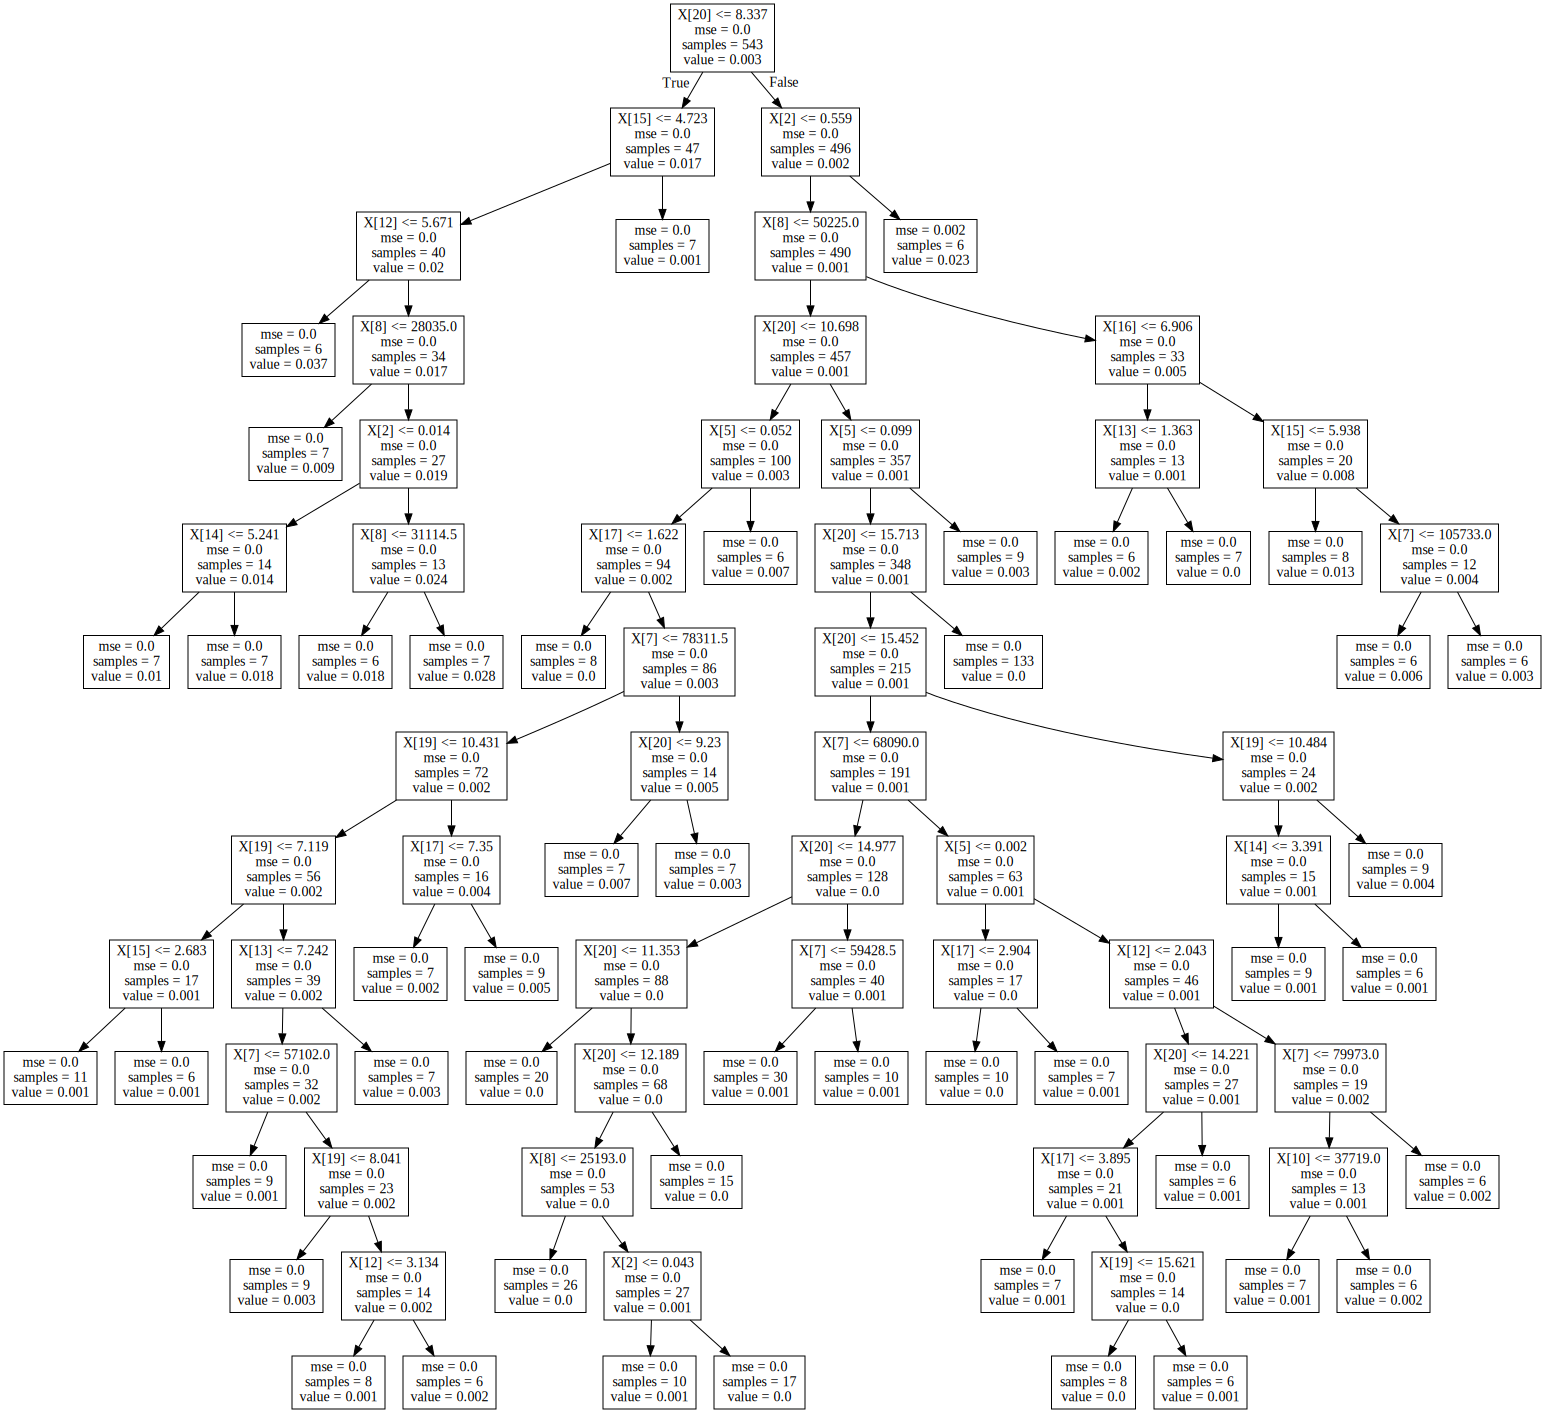

In [24]:
dotdata = sklearn.tree.export_graphviz(model_best)
graph = graphviz.Source(dotdata)
graph

## Basic Random Forest

In [25]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtrain)
err_train = mean_squared_error(ytrain, ypred)
ypred = model.predict(xtest)
err_test = mean_squared_error(ypred, ytest)
print(f'Train Error:\t{err_train}')
print(f'Test Error:\t{err_test}')

/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train Error:	7.731786993850282e-06
Test Error:	2.9016047981442914e-05


## Cross Validated Random Forest Regressor

In [26]:
model = RandomForestRegressor(min_samples_leaf=6)
folder = KFold(n_splits=5, random_state=None, shuffle=True)
folds = folder.split(xtrain, ytrain)
params = {'n_estimators':np.arange(10,101,10)}
cv_model = GridSearchCV(model, param_grid=params, scoring=make_scorer(mean_squared_error), cv=folds)
cv_model.fit(xtrain, ytrain.values.ravel())

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fb9793918d0>,
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=6,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             

In [27]:
pd.DataFrame(cv_model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.177306,0.012553,0.005274,0.000271,50,{'n_estimators': 50},0.000017,0.000017,0.000012,0.000152,0.000055,0.000051,0.000053,1
0,0.050380,0.009895,0.004972,0.004840,10,{'n_estimators': 10},0.000021,0.000020,0.000012,0.000154,0.000045,0.000050,0.000053,2
7,0.273830,0.008373,0.007520,0.000847,80,{'n_estimators': 80},0.000018,0.000017,0.000011,0.000151,0.000053,0.000050,0.000052,3
3,0.203168,0.033403,0.006800,0.002766,40,{'n_estimators': 40},0.000017,0.000017,0.000011,0.000150,0.000052,0.000050,0.000052,4
6,0.238007,0.009120,0.006202,0.000607,70,{'n_estimators': 70},0.000016,0.000018,0.000012,0.000151,0.000050,0.000049,0.000053,5
5,0.207217,0.011772,0.005130,0.000653,60,{'n_estimators': 60},0.000016,0.000018,0.000012,0.000152,0.000048,0.000049,0.000053,6
2,0.122856,0.012572,0.004868,0.001361,30,{'n_estimators': 30},0.000019,0.000018,0.000010,0.000149,0.000050,0.000049,0.000052,7
9,0.401490,0.046488,0.008295,0.000677,100,{'n_estimators': 100},0.000016,0.000017,0.000011,0.000151,0.000049,0.000049,0.000053,8
8,0.306725,0.008481,0.007673,0.000500,90,{'n_estimators': 90},0.000016,0.000019,0.000011,0.000150,0.000049,0.000049,0.000052,9
1,0.095653,0.023070,0.003873,0.002589,20,{'n_estimators': 20},0.000015,0.000018,0.000011,0.000150,0.000045,0.000048,0.000053,10


In [28]:
model_best = cv_model.best_estimator_
ypred = model_best.predict(xtrain)
err_train = mean_squared_error(ytrain, ypred)
ypred = model_best.predict(xtest)
err_test = mean_squared_error(ypred, ytest)
print(f'Train Error:\t{err_train}')
print(f'Test Error:\t{err_test}')

Train Error:	3.3788069581735334e-05
Test Error:	1.3775723685342429e-05


Text(0, 0.5, 'ytest')

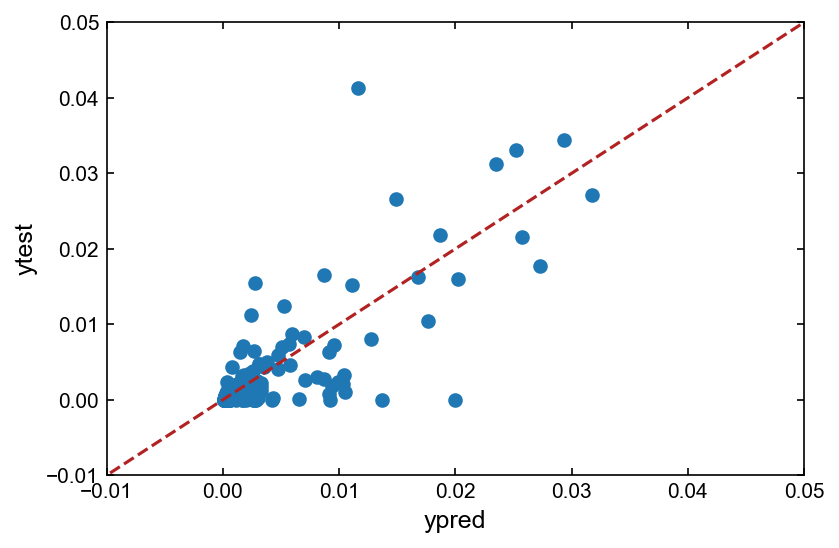

In [29]:
fig, ax = plt.subplots()
ax.scatter(ypred, ytest)
ax.plot([-1,1],[-1,1], color='firebrick', ls='--')
ax.set_xlim(-0.01,0.05)
ax.set_ylim(-0.01,0.05)
ax.set_xlabel('ypred')
ax.set_ylabel('ytest')

# Temporal Prediction

## 2017 $\rightarrow$ 2018

In [30]:
data.head()

,"9th to 12th grade, no diploma",high school graduate (includes equivalency),"some college, no degree",associate's degree,bachelor's degree,graduate or professional degree,year,median income (family),median income (nonfamily),total population,occupied housing units,"1-unit, attached",2 units,3 or 4 units,5 to 9 units,10 to 19 units,20 or more units,mobile home,"boat, rv, van, etc.",commute time,co2_conc,count
0,6.6,20.3,18.4,6.9,24.0,16.3,2010,85014.0,44439.0,1477980,532026,8.242266,4.516133,7.746238,6.190675,5.983918,16.833576,1.344671,0.115032,12.456474,9.671581,0.000014
1,9.8,30.5,28.5,9.5,13.2,5.8,2010,65103.0,33411.0,38327,14715,3.533809,2.324159,2.154264,0.767924,1.230037,2.657153,9.113150,0.013592,9.893939,9.671581,0.000026
2,5.9,19.7,22.3,8.2,24.5,13.7,2010,91791.0,47627.0,1024809,368087,8.502881,2.053047,5.690774,5.219690,3.747755,8.936203,1.937314,0.062757,13.799532,9.671581,0.000010
3,10.8,23.2,22.6,7.6,13.4,6.3,2010,52306.0,28843.0,908830,283836,2.584943,3.393157,8.102919,8.195578,2.956637,5.566242,4.951451,0.144450,8.000660,9.671581,0.000002
4,6.4,26.0,29.3,8.8,17.7,8.6,2010,53221.0,24568.0,133058,54276,3.758567,4.875083,6.387722,4.355516,2.546245,3.080551,10.761663,0.287420,7.378587,9.671581,0.000015


In [ ]:
year_range = np.arange(2013, )